In [3]:
import pandas as pd


In [7]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [8]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "NaN"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
print(meine_daten.topic_comment.value_counts())
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

# print(meine_daten.Username.value_counts())
# meine_daten.loc[meine_daten.Username == "Coraggioso-Ir6WKaaMR"]


politik                124
impfung                118
lockdown                96
maßnahmen               79
infektion               57
virus                   29
lockerung               28
wirtschaft              25
maskenpflicht           21
reise                   21
tests                   12
schulschliessung         8
usa                      8
demos                    8
homeoffice               7
quarantäne               7
reiseverbot              6
inzidenz                 4
china                    4
demo                     4
krise                    4
schulschließung          3
testen                   3
fußball                  3
konjunktur               3
antikörper               2
warnapp                  2
schulöffnung             2
ausgangssperre           2
tourismus                2
intensivstation          2
kontaktbeschränkung      2
RKI                      2
arbeit                   2
kontrolle                2
negative                 2
querdenker               2
i

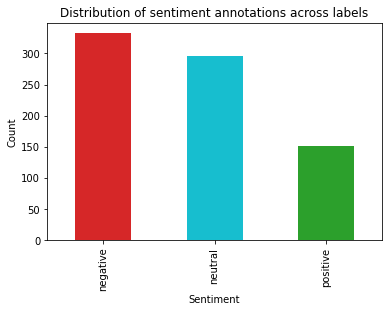

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


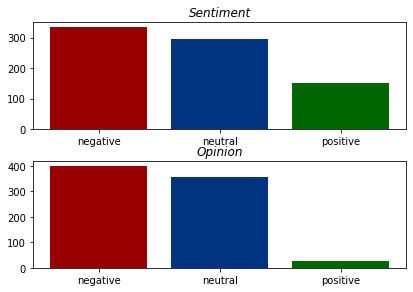

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [11]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

# meine_daten.Sentiment.value_counts()

# meine_daten.loc[(meine_daten.Sentiment == "positive")]

,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment
28,03ec41da-fcbc-45fc-a6da-cafb4b22e6f3,2021-07-06,09:14,0.0,Elmar-JHQ5DhyZR,positive,negative,lockdown,NaN,CDU-Politiker Rudolf Henke spricht sich für sc...
29,00000000-0002-0001-0000-000175196782,2021-02-05,16:17,0.0,KrautUndRuebe,positive,negative,lockerung,NaN,»Wir sollten aber diejenigen Maßnahmen zurückn...
44,3a2d696a-7263-41fc-856a-08bd70fde7b7,2021-02-11,18:56,0.0,Lothar-my1NiJTGg,positive,negative,reise,NaN,Das hätte doch schon lange gemacht werden müss...
53,783c321b-f7b7-4348-b202-207738d3fcff,2020-04-29,20:11,0.0,Andreas-cjPixr8Wg,positive,negative,infektion,NaN,Das ist das übliche Spiel mit absoluten Zahlen...
64,77abffe1-489f-4252-a8a8-6810d91da1e7,2020-03-17,21:04,0.0,K.-0c91rsXWg,positive,negative,lockdown,NaN,Prognose: 60-70 % der Deutschen werden sich an...
69,1cfcdc0b-d820-4567-88e4-81e3059c5dd3,2020-10-15,08:14,0.0,GuckyCD,positive,negative,lockdown,NaN,Wir sehen hier in Echtzeit ein Versagen des Fö...
79,1aa94e4e-f535-47d1-85a0-036e1d614b43,2020-10-13,14:24,0.0,biesi,positive,negative,lockdown,NaN,Söders Dauer-Alarmismus nutzt sich ab. Viele B...
84,1a93d459-e1f5-45e4-803a-96dac15643e5,2021-03-22,07:43,0.0,Klaus-LS_tBnPWg,positive,negative,lockdown,NaN,Lockdown verlaengern - OK. Dann aber auch kons...
85,d8568f22-7d8e-43e1-aa10-ca833c0ebcd4,2020-10-14,19:26,0.0,Bodo-wQhmq7PZR,positive,negative,lockdown,NaN,Warum sagt uns eigentlich niemand was vor den ...
89,4f00e970-dfa9-40b0-88cf-22938193bd8b,2021-01-23,18:01,0.0,tscho-FD6RHbEZg,positive,negative,einreiseregel,einreiseregel,In einer dieser Maschinen vom DXB sitze ich mo...
